In [1]:
import sympy as sm
import numpy as np
from timeit import timeit
import matplotlib.pyplot as plt

In [2]:
__file__ = 'C:/Users/Gilles/CS/cours/PoleProjet/FormationRecherche/Tsunami/TP/sceance4/Tsunami'

In [3]:
import os

print(os.getcwd())
os.chdir(__file__)
print(os.getcwd())

c:\Users\Gilles\CS\cours\PoleProjet\FormationRecherche\Tsunami\TP\sceance4\Tsunami\differentiate
C:\Users\Gilles\CS\cours\PoleProjet\FormationRecherche\Tsunami\TP\sceance4\Tsunami


## What's the fastest way to differentiate our sympy expressions ?

In [2]:
x = sm.Symbol('x')

def diff_all_at_once(expr_0):
    return sm.diff(expr_0,x,4)

def diff_gradually(expr_0):
    expr_1 = sm.diff(expr_0,x,1)
    expr_2 = sm.diff(expr_1,x,1)
    expr_3 = sm.diff(expr_2,x,1)
    expr_4 = sm.diff(expr_3,x,1)
    return expr_4

# expr_0 = (x**2-x+1)**20
# print(sm.expand(diff_gradually(expr_0)),'\n \n',sm.expand(diff_all_at_once(expr_0)))
# print(diff_gradually(expr_0)==diff_all_at_once(expr_0)) # this comparison does not work

expr_0 = (x**2-x+1)**20
print(expr_0)
print(timeit(lambda : diff_all_at_once(expr_0),number=1000))
print(timeit(lambda : diff_gradually(expr_0),number=1000))

expr_0 = x**2**20
print(expr_0)
print(timeit(lambda : diff_all_at_once(expr_0),number=1000))
print(timeit(lambda : diff_gradually(expr_0),number=1000))

expr_0 = sm.exp(x**2-1)**20
print(expr_0)
print(timeit(lambda : diff_all_at_once(expr_0),number=1000))
print(timeit(lambda : diff_gradually(expr_0),number=1000))

expr_0 = sm.sin(x**2-1)**20
print(expr_0)
print(timeit(lambda : diff_all_at_once(expr_0),number=1000))
print(timeit(lambda : diff_gradually(expr_0),number=1000))

(x**2 - x + 1)**20
9.394887400000002
0.9346837999999984
x**1048576
0.4959321999999986
0.5476672000000029
exp(20*x**2 - 20)
4.188609400000001
0.6795217999999998
sin(x**2 - 1)**20
13.136855099999998
1.1482468000000026


One can `lambdify` lists but not arrays. 

In [17]:
x,y = sm.symbols('x,y')
variables = [x,y]

A = [[x],[x**2]]
print(sm.diff(A[0][0],x,1))
A = sm.lambdify([x],[[x],[x**2]], 'numpy')
print(A(2))

1
[[2], [4]]


In [31]:
A = [[y,y**2,x],[x**2,[y+1]]]
B = sm.lambdify(variables,A,'numpy')

print(B(1,2))
A[0][0] = x
A[1][1] = y
print(B(1,2)) # no 'effet de bord'
# print(A.evalf(subs={x: 1, y: 2})) => has to choose one A[.][.] before

[[2, 4, 1], [1, [3]]]
[[2, 4, 1], [1, [3]]]


#### Back to our problem :

In [5]:
def dynamic_diff_2D(expr_00, l_orders, tab_diff = []):
    if not(len(tab_diff)):
        tab_diff = [[expr_00]]
    for t_order in l_orders:
        a,b=(t_order)
        for i in range(1,a+1):
            if len(tab_diff)<=i:
                tab_diff.append([sm.diff(tab_diff[i-1][0],x)])
        for j in range(1,b+1):
            if len(tab_diff[a])<=j:
                tab_diff[a].append(sm.diff(tab_diff[a][j-1],y))
    return tab_diff[a][b]

def diff_all_at_once_2D(expr_00,t_order):
    dfn = expr_00
    for i, var in enumerate(variables):
        dfn = sm.diff(dfn, var, t_order[i])
    return dfn

In [6]:
t_order = (2,5)

expr_00 = (x**2-x+1+y**3)**20
print(expr_00)
print(timeit(lambda : diff_all_at_once_2D(expr_00,t_order),number=1000))
print(timeit(lambda : dynamic_diff_2D(expr_00,[t_order]),number=1000))

expr_00 = (x*y)**2**20
print(expr_00)
print(timeit(lambda : diff_all_at_once_2D(expr_00,t_order),number=1000))
print(timeit(lambda : dynamic_diff_2D(expr_00,[t_order]),number=1000))

expr_00 = sm.exp(x**2-1+y**3)**20
print(expr_00)
print(timeit(lambda : diff_all_at_once_2D(expr_00,t_order),number=1000))
print(timeit(lambda : dynamic_diff_2D(expr_00,[t_order]),number=1000))

expr_00 = sm.sin(x**2-1+y**3)**20
print(expr_00)
print(timeit(lambda : diff_all_at_once_2D(expr_00,t_order),number=1000))
print(timeit(lambda : dynamic_diff_2D(expr_00,[t_order]),number=1000))


(x**2 - x + y**3 + 1)**20
30.775216300000004
2.325136400000005
x**1048576*y**1048576
0.6674624000000051
0.6651176000000021
exp(20*x**2 + 20*y**3 - 20)
8.795723899999999
2.1101788
sin(x**2 + y**3 - 1)**20
146.22511329999998
5.539002600000003


In [14]:
timeit(lambda: dynamic_diff_2D((x**2-x+1+y**3)**20,[(2,5)]*50),number=1000) # almost the same time (considering deviation)

2.592638299999976

#### Comparison of the speed to differentiate the expressions

In [4]:
from Polynomials.F_functions import F2D
import Polynomials.set_coords as psc

In [29]:
coords = psc._set_coords_rectangle(1,2,nnodes_max=10)
l_strfn = ['xpy_real', 'xpy_np_real', 'sinxpy_real', 'sinxpy_np_real', 'expxpy_real', 'expxpy_np_real', 'xpy_cmplx', 'xpy_np_cmplx']
N = 1

print(f'with times computed over {N} iterations:')
for strfn in l_strfn:
    print(f'method:{strfn}')
    time_set = timeit(lambda:F2D(coords,strfn,l_orders=[]),number = N)
    print('time to set:', time_set)
    time_set_diff = timeit(lambda:F2D(coords,strfn,l_orders=[(0,1),(0,2),(1,0),(2,0)]),number=N)
    print('time to set and differentiate by [(0,1),(0,2),(1,0),(2,0)]:', time_set_diff)
    print('time to differentiate by [(0,1),(0,2),(1,0),(2,0)] without setting:',time_set_diff-time_set)
    print()


with times computed over 1 iterations:
method:xpy_real
time to set: 0.0036901999999940927
time to set and differentiate by [(0,1),(0,2),(1,0),(2,0)]: 0.02314900000004627
time to differentiate by [(0,1),(0,2),(1,0),(2,0)] without setting: 0.01945880000005218

method:xpy_np_real
time to set: 0.021562499999959073
time to set and differentiate by [(0,1),(0,2),(1,0),(2,0)]: 2.210701200000017
time to differentiate by [(0,1),(0,2),(1,0),(2,0)] without setting: 2.1891387000000577

method:sinxpy_real
time to set: 0.0034254999999916436
time to set and differentiate by [(0,1),(0,2),(1,0),(2,0)]: 0.026955999999984215
time to differentiate by [(0,1),(0,2),(1,0),(2,0)] without setting: 0.02353049999999257

method:sinxpy_np_real
time to set: 0.023729500000001735
time to set and differentiate by [(0,1),(0,2),(1,0),(2,0)]: 2.3206983000000037
time to differentiate by [(0,1),(0,2),(1,0),(2,0)] without setting: 2.296968800000002

method:expxpy_real
time to set: 0.00785990000002812
time to set and differen

done over 1 iterations
method used:xpy_real / nnodes_max = 5 / nnodes_max = 10 / nnodes_max = 15 / nnodes_max = 20 / nnodes_max = 25 / nnodes_max = 30 / 
method used:xpy_np_real / nnodes_max = 5 / nnodes_max = 10 / nnodes_max = 15 / nnodes_max = 20 / nnodes_max = 25 / nnodes_max = 30 / 
method used:sinxpy_real / nnodes_max = 5 / nnodes_max = 10 / nnodes_max = 15 / nnodes_max = 20 / nnodes_max = 25 / nnodes_max = 30 / 
method used:sinxpy_np_real / nnodes_max = 5 / nnodes_max = 10 / nnodes_max = 15 / nnodes_max = 20 / nnodes_max = 25 / nnodes_max = 30 / 
method used:expxpy_real / nnodes_max = 5 / nnodes_max = 10 / nnodes_max = 15 / nnodes_max = 20 / nnodes_max = 25 / nnodes_max = 30 / 
method used:expxpy_np_real / nnodes_max = 5 / nnodes_max = 10 / nnodes_max = 15 / nnodes_max = 20 / nnodes_max = 25 / nnodes_max = 30 / 
method used:xpy_cmplx / nnodes_max = 5 / nnodes_max = 10 / nnodes_max = 15 / nnodes_max = 20 / nnodes_max = 25 / nnodes_max = 30 / 
method used:xpy_np_cmplx / nnodes_max 

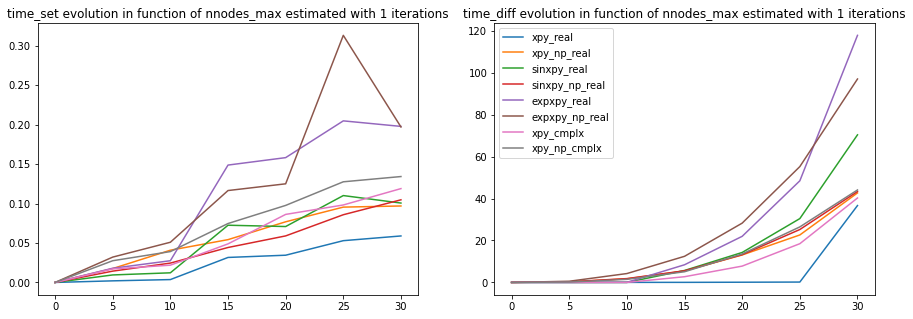

In [28]:
l_strfn = ['xpy_real', 'xpy_np_real', 'sinxpy_real', 'sinxpy_np_real', 'expxpy_real', 'expxpy_np_real', 'xpy_cmplx', 'xpy_np_cmplx']
history = {strfn:[np.zeros((1,2)),np.zeros((1,2))] for strfn in l_strfn}

l_nnodes = [5,10,15,20,25,30]
# l_nnodes = [5,10]
N = 1
print(f'done over {N} iterations')
l_orders = [(0,1),(0,2),(1,0),(2,0)]  # useful for Poisson's equation

plt.figure(1,figsize=(15,5))

for strfn in l_strfn:
    print(f'method used: {strfn}',end=' / ')
    for nnodes_max in l_nnodes:
        print(f'nnodes_max = {nnodes_max}', end = ' / ')
        coords = psc._set_coords_rectangle(1,2,nnodes_max=nnodes_max)
        time_set = timeit(lambda:F2D(coords,strfn,l_orders=[]),number = N)
        time_set_diff = timeit(lambda:F2D(coords,strfn,l_orders=l_orders),number=N)
        time_diff = time_set_diff-time_set
        history[strfn][0] = np.concatenate((history[strfn][0],np.array([[nnodes_max,time_set/N]])),axis=0)
        history[strfn][1] = np.concatenate((history[strfn][1],np.array([[nnodes_max,time_diff/N]])),axis=0)
    plt.subplot(121)
    plt.plot(history[strfn][0][:,0],history[strfn][0][:,1], label=strfn)
    plt.title(f'time_set(s) evolution in function of nnodes_max estimated with {N} iterations')
    plt.subplot(122)
    plt.plot(history[strfn][1][:,0],history[strfn][1][:,1], label=strfn)
    plt.title(f'time_diff(s) evolution in function of nnodes_max estimated with {N} iterations')
    print()
plt.legend()
plt.show()

Remarks:

- the lambdification takes time to convert => yet, we will use it no matter what. Indeed, it allows to directly evaluate the expressions on all the coordinates efficiently. See NN_test_function_A_F.ipynb
- sinxpy* and expxpy* which were "smoother" take more time to differentiate (up to four times xpy_real)
- time_diff evolution seems exponential => take care of large set of boundary coordinates

Rk for myself:
- to be clean, you might use `config={'history':history,...}`.